# Logistic Regression: Coronary Heart Disease Prediction

Below is a binary classification problem, and we want to analyze a possible solution using a logistic regression model. We aim to implement the mentioned algorithm, initially using the SciKit-Learn library and then manually developing the same training process (Stochastic Gradient Descent).

We will also introduce some concepts for dealing with imbalanced data such as: confusion matrix, ROC curve, and some other important metrics.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
heart_df=pd.read_csv("heartDisease/framingham.csv")
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
print(f'There are {len(heart_df)} data points.')

There are 3749 data points.


### Class Distribution Analysis

In the diagram below, you can observe a clear class imbalance in the data, which we will address in subsequent steps.

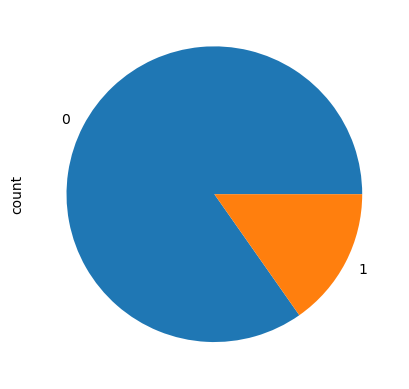

In [4]:
heart_df['TenYearCHD'].value_counts().plot(kind='pie')
plt.show()

## Variable Description

Each attribute is a potential risk factor. There are demographic, behavioral, and medical factors.

- Demographic:

    - male: male (1) or female (0); (Nominal)

    - age: age of the patient; (Continuous: although the recorded ages have been truncated to integers, the concept of age is continuous)

- Behavioral:

    - currentSmoker: whether the patient is a current smoker or not (nominal)

    - cigsPerDay: the number of cigarettes the person smoked on average in a day (can be considered continuous since one can have any number of cigarettes, even half a cigarette).

- Medical history:

    - BPMeds: whether the patient was taking blood pressure medication or not (nominal)

    - prevalentStroke: whether the patient had previously had a stroke or not (nominal)

    - prevalentHyp: whether the patient was hypertensive or not (nominal)

    - diabetes: whether the patient had diabetes or not (nominal)

- Current Medical Status:

    - totChol: total cholesterol level (continuous)

    - sysBP: systolic blood pressure (continuous)

    - diaBP: diastolic blood pressure (continuous)

    - BMI: body mass index (continuous)

    - heartRate: heart rate (continuous: in medical research, variables like heart rate, although actually discrete, are considered continuous due to the large number of possible values).

    - glucose: glucose level (continuous)

- **Variable to Predict**

    - TenYearCHD: Risk of coronary heart disease 10 years in the future (binary: "1" means "Yes", "0" means "No")


In [5]:
x = heart_df.values
scaler = MinMaxScaler() # Utilice un MinMaxScaler en esta ocasión #
x_scaled = scaler.fit_transform(x) # Aplique el escalamiento #
heart_df_scaled = pd.DataFrame(x_scaled, columns=heart_df.columns) # Conversión a un DataFrame #

In [6]:
x = heart_df_scaled.iloc[:,:-1]
y = heart_df_scaled.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

## Part 1

Now we use the `LogisticRegression` function from SciKit-Learn to obtain an initial logistic regression model and calculate its accuracy using the `accuracy_score` function.

In [7]:
logreg = LogisticRegression() # Logistic Regression Model #
logreg.fit(x_train, y_train) # Training over our data #
y_pred = logreg.predict(x_test) # We predict our labels #

print(f'Initial precision: {accuracy_score(y_test, y_pred)}')

Initial precision: 0.844


### Confusion Matrix

As you may recall, the information in this dataset does not have a balanced class distribution. The confusion matrix is a tool that allows analyzing the behavior of the model for such data.

You can find more information in this article: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)


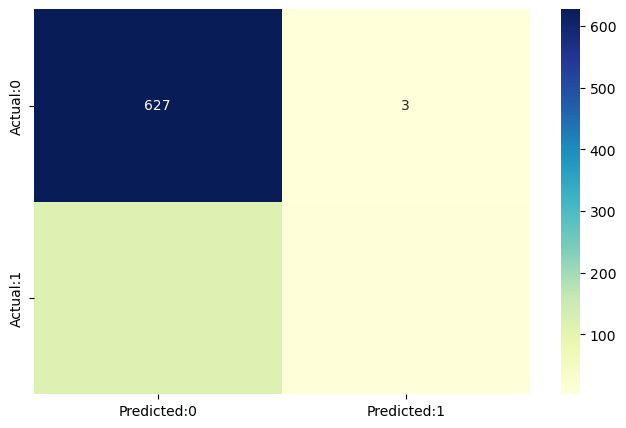

In [8]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Data Treatment for IMbalanced Data

In cases like pathological trend identification, it's common to have unbalanced data, or where the severity of making type I or type II errors are quite different. In many cases, one may prefer to commit a certain type of error over the other. To work with these problems, it's often preferable to sacrifice some model accuracy in exchange for practical improvements.

This process involves modifying the threshold from which it's decided if a data point belongs to one class or another. We use the `binarize` function to obtain values of `0` or `1` based on the prediction probabilities obtained using the `model.predict_proba` function.

Some metrics used to interpret model performance include:

- F1Score
- TP Rate / Recall / Sensitivity
- TN Rate / Specificity

You can find more information about these metrics in the following articles:
- [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Sensitivity Vs Specificity In Data Science](https://medium.com/fintechexplained/sensitivity-vs-specificity-in-data-science-2f673039dbd1)


In [9]:
from sklearn.preprocessing import binarize

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Vector that contains the thresholds to analyze #

for threshold in thresholds:
    cm2 = 0
    y_pred_prob_yes = logreg.predict_proba(x_test) # Use the predict_proba function to calculate the probabilities of belonging to class 1 #
    y_pred2 = binarize(y_pred_prob_yes, threshold=threshold) # Use the binarize function to convert probabilities to classes 0 and 1 #
    cm2 = confusion_matrix(y_test, y_pred2[:,1])
    print(f'''->For a threshold of {round(threshold,4)} we have this confusion matrix:
{cm2}
With {cm2[0,0]+cm2[1,1]} correct predictions and {cm2[1,0]} false negatives.
Sensitivity (Recall): {round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 4)} Specificity: {round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), 4)}\n''')


->For a threshold of 0.1 we have this confusion matrix:
[[309 321]
 [ 18 102]]
With 411 correct predictions and 18 false negatives.
Sensitivity (Recall): 0.85 Specificity: 0.4905

->For a threshold of 0.2 we have this confusion matrix:
[[512 118]
 [ 62  58]]
With 570 correct predictions and 62 false negatives.
Sensitivity (Recall): 0.4833 Specificity: 0.8127

->For a threshold of 0.3 we have this confusion matrix:
[[583  47]
 [ 94  26]]
With 609 correct predictions and 94 false negatives.
Sensitivity (Recall): 0.2167 Specificity: 0.9254

->For a threshold of 0.4 we have this confusion matrix:
[[614  16]
 [104  16]]
With 630 correct predictions and 104 false negatives.
Sensitivity (Recall): 0.1333 Specificity: 0.9746

->For a threshold of 0.5 we have this confusion matrix:
[[627   3]
 [114   6]]
With 633 correct predictions and 114 false negatives.
Sensitivity (Recall): 0.05 Specificity: 0.9952

->For a threshold of 0.6 we have this confusion matrix:
[[629   1]
 [119   1]]
With 630 corr

On the other hand, a criterion that facilitates visualizing this trade-off is known as the ROC Curve, where multiple points are plotted for different classification threshold values. You can read the article below for a more detailed explanation:
- ROC Curve: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)


AUC = 0.7342



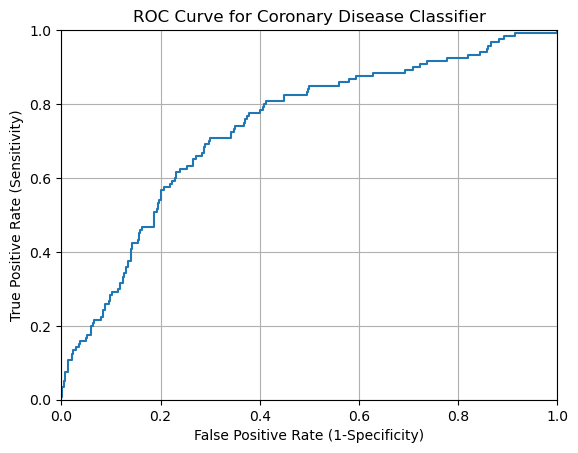

In [10]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
print(f'AUC = {np.round(metrics.auc(fpr, tpr), 4)}\n')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Coronary Disease Classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

indices = []
for i in range(len(fpr)):
    if fpr[i] >= 0.40634920634920635 and fpr[i] <= 0.43:
        indices.append(i)


From the graph and regarding the classification problem in our context, it can be said that a good proportion of TPR and FPR to choose would be at a point on the ROC curve where there is a low rate of false negatives, that is, a high rate of true positives. This point on the ROC curve corresponds to the highest possible point on the y-axis (TPR). This is because indicating that a patient is not sick when they actually are can lead to serious consequences such as the death of these individuals, legal action, or high economic costs.

It is also important to mention that a false positive in our case does not lead to consequences as severe as the previous case, as marking someone as sick who truly is not does not lead to the death of the patient, and it is not as likely that legal action will be taken for this reason, for example. However, it is also better to keep the rate of false positives away from 1, so that the classifier does not make mistakes by assigning true negatives all the time.

Therefore, in this case, it is preferable to minimize false negatives (increase sensitivity) and keep false positives as far away as possible from 1, without losing too much effectiveness when classifying negatives. This has the trade-off of having to sacrifice effectiveness when classifying true negatives.

**A good point where there is high sensitivity and an acceptable false positive rate is at the point** ***(FPR = 0.41, TPR = 0.8)***

On the other hand, the area under the curve (AUC) represents the measure of separability, that is, it indicates how well the model can distinguish between the classes (0 and 1 in this case). Therefore, the closer the AUC is to 1, the better the distinction between patients without coronary heart disease and those with it. For the model performed in Part 1, we have an AUC of 0.7342, so it can be said that there is a good distinction between classes but it could be improved. This can be evidenced in the confusion matrices for the different thresholds, as each of them shows a high number of false negatives.


In [11]:
ratio = tpr[132]/fpr[132]
print(f'ratio = TPR/FPR = {tpr[132]}/{np.round(fpr[132], 2)} = {np.round(ratio, 4)}')

ratio = TPR/FPR = 0.8/0.41 = 1.9385


## Part 2

We now develop your own implementation of the Stochastic Gradient Descent method for a logistic regression model. The model was trained using 80% of the data. At the end of the training, the list "errors" should contain the error function values for each iteration, allowing you to observe the progress graphically.


For a rate of 0.01:

Model confusion matrix:
 [[630   0]
 [120   0]]

Sensitivity: 0.0

False negatives: 120

-----------------------------------

For a rate of 0.02:

Model confusion matrix:
 [[628   2]
 [118   2]]

Sensitivity: 0.0167

False negatives: 118

-----------------------------------

For a rate of 0.03:

Model confusion matrix:
 [[620  10]
 [116   4]]

Sensitivity: 0.0333

False negatives: 116

-----------------------------------

For a rate of 0.04:

Model confusion matrix:
 [[628   2]
 [119   1]]

Sensitivity: 0.0083

False negatives: 119

-----------------------------------

For a rate of 0.05:

Model confusion matrix:
 [[624   6]
 [116   4]]

Sensitivity: 0.0333

False negatives: 116

-----------------------------------

For a rate of 0.07:

Model confusion matrix:
 [[629   1]
 [119   1]]

Sensitivity: 0.0083

False negatives: 119

-----------------------------------

For a rate of 0.08:

Model confusion matrix:
 [[618  12]
 [106  14]]

Sensitivity: 0.1167

False negati

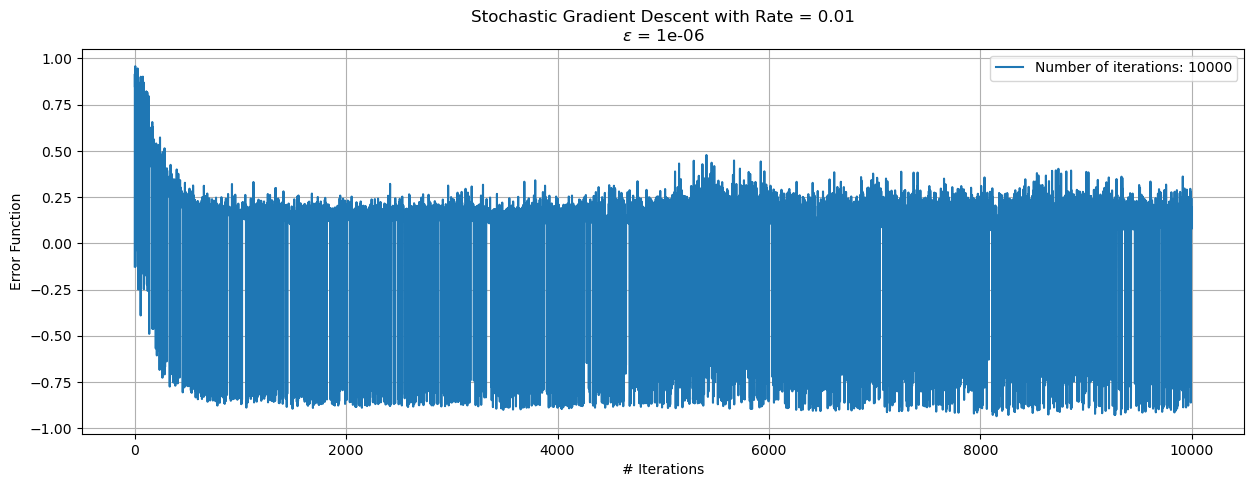

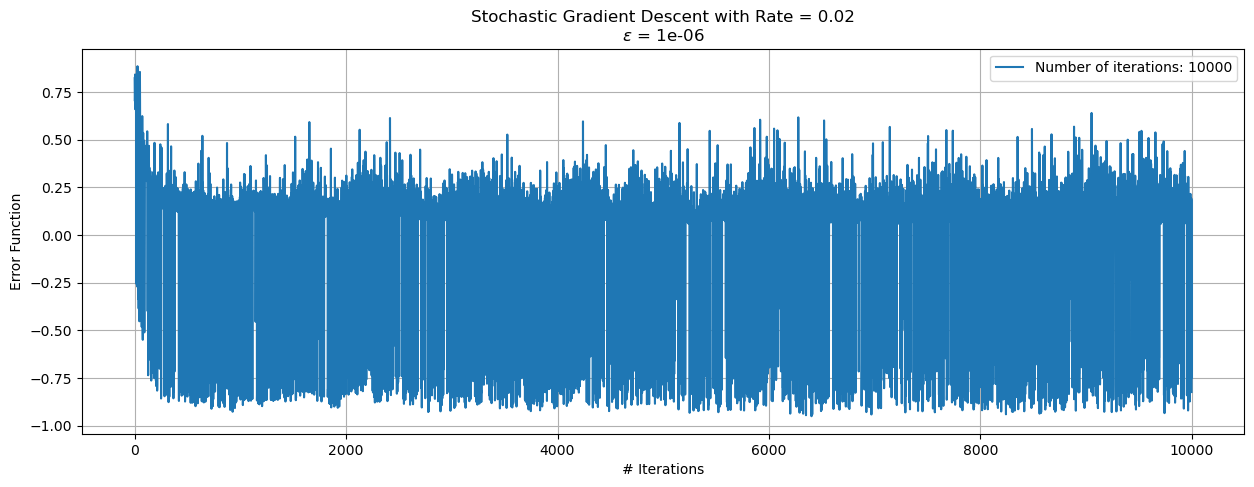

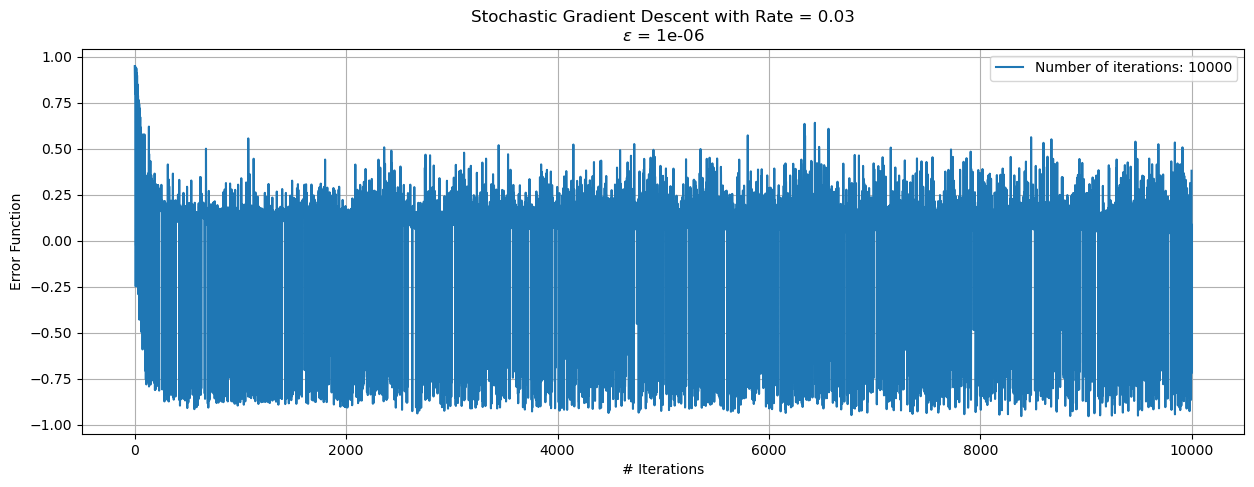

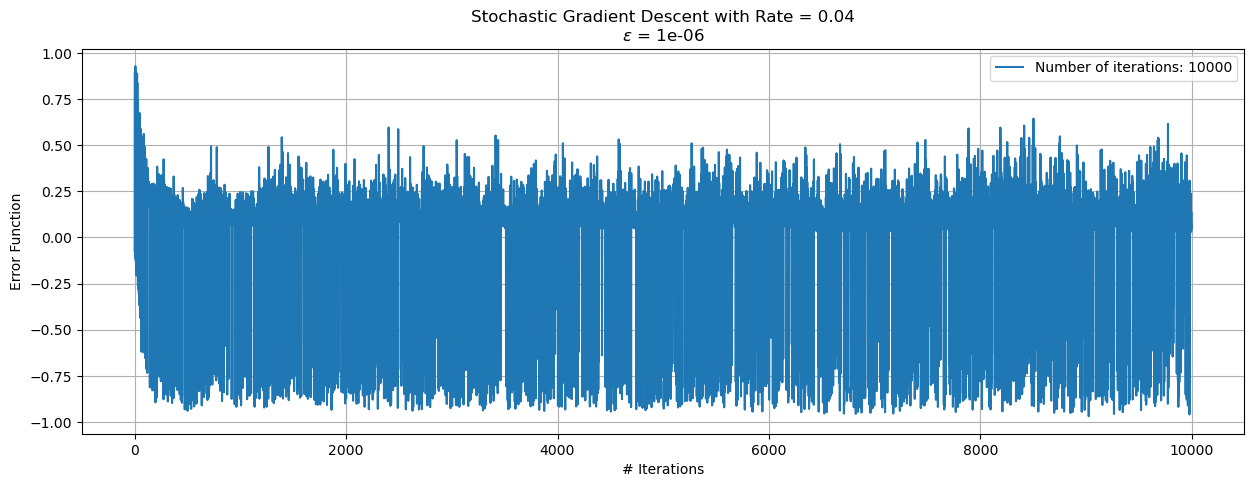

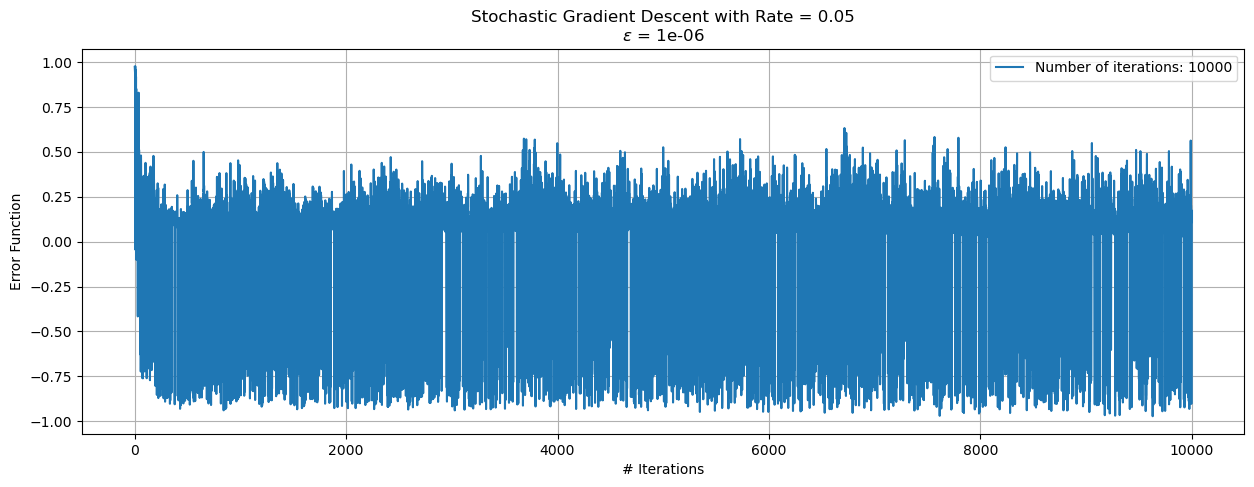

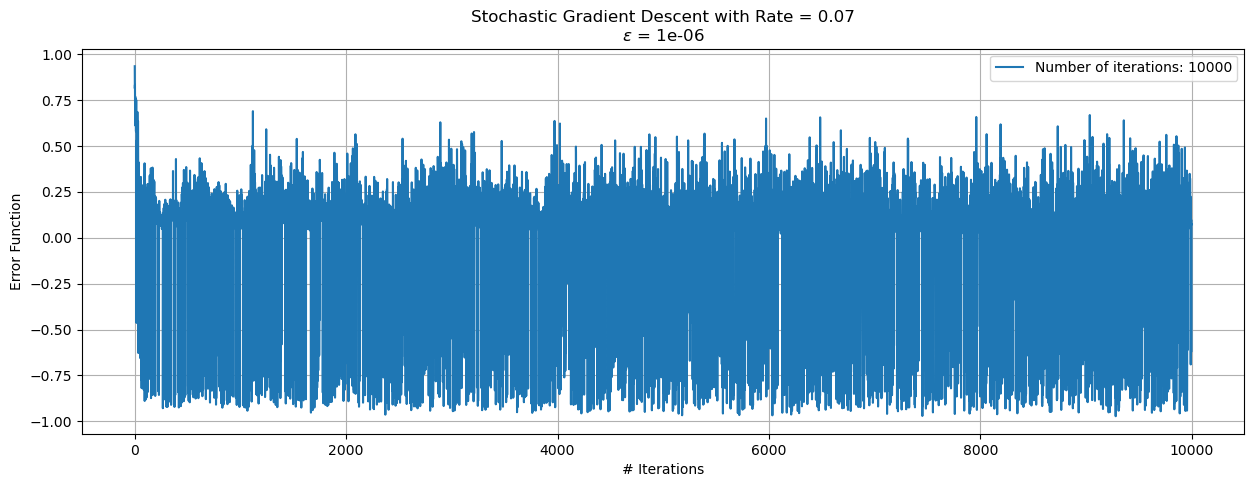

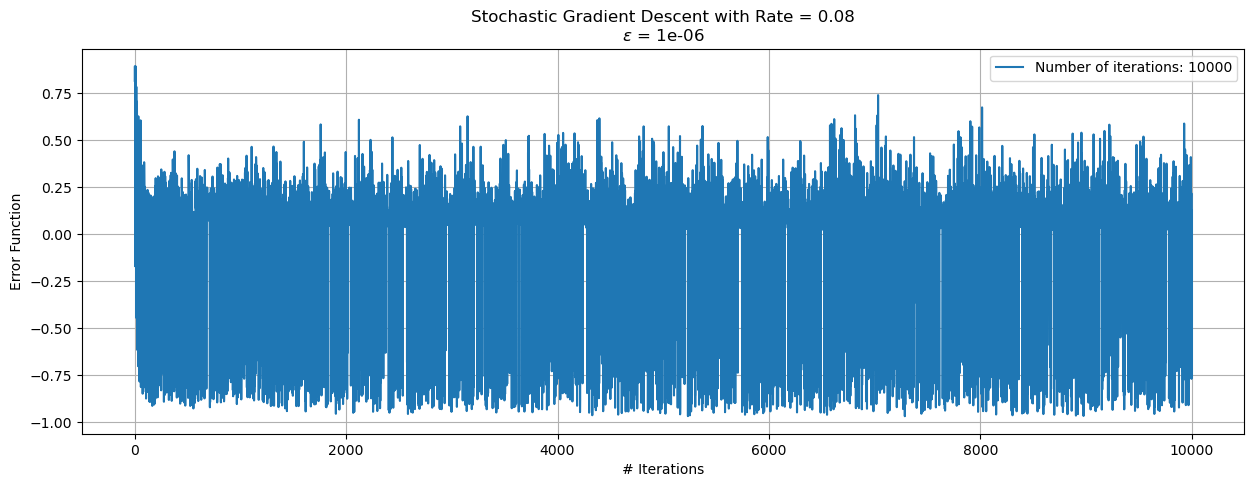

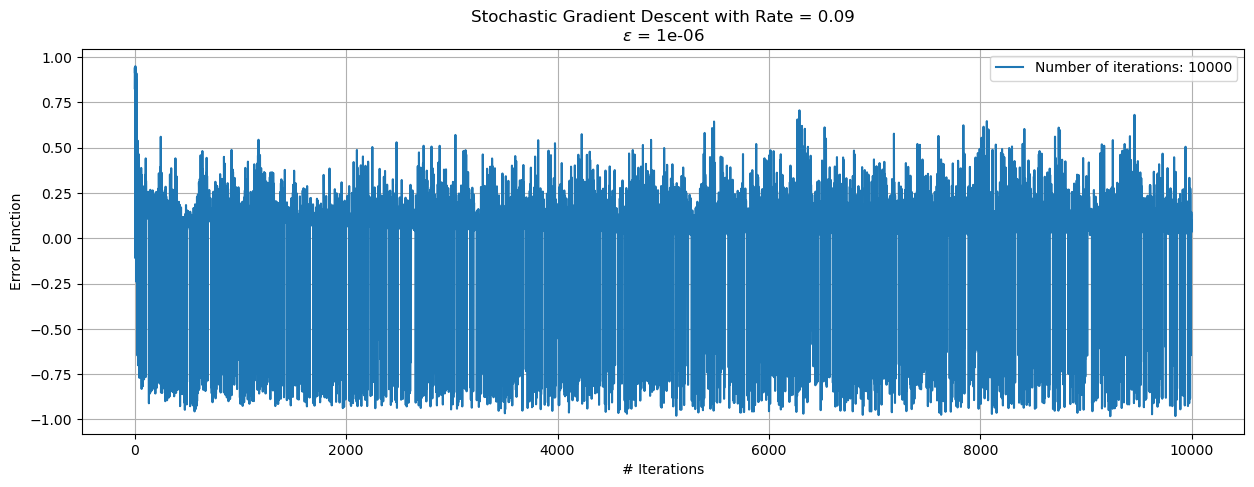

In [12]:
np.random.seed(22)
X_train_array = np.c_[np.ones(x_train.values.shape[0]), x_train.values]
y_train_array = y_train.values

# Initialization of stopping criterion (by decreasing the value of eps, the precision and processing time increase)
eps = 1e-6

def sigma(w,x):
    res_sigmoid = 1/(1+np.exp(np.matmul(-w.T, x))) # Output of the sigmoid function #
    return res_sigmoid

# Lists to monitor learning
errors = []
ypreds = []
recalls = []

tasas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.08, 0.09] # Define a vector containing the rates you want to try #

for tasa in tasas:

    w0 = np.random.rand(X_train_array.shape[1]) # Initialization of w #
    w = w0.copy()
    w = np.asarray(np.matrix(w)).T
    dif = 100

    # while dif > eps:         # Stopping criterion 1 #
    for j in range (0, 10000):  # Stopping criterion 2 #
        # # Algorithm development # #

        # Random pair selection
        i = np.random.randint(low=0, high=y_train_array.shape[0]) # Random position #
        xActual = np.matrix(np.array(X_train_array[i])).T
        yActual = np.matrix(np.array(y_train_array[i])).T
        
        # Calculate the gradient and error
        grad = sigma(w, xActual)
        e = grad - yActual
        
        # Calculate the parameter vector for the current iteration
        w_nuevo = w - tasa*float(e)*xActual
        
        # Calculate the difference between the current w and the previous one
        dif = np.linalg.norm(w-w_nuevo)
        
        # Add the error to the error list
        errors.append(float(e))

        # Update the parameter value
        w = w_nuevo
        
        # # # # # # # # # # # # # #
                
    X_test_array = np.c_[np.ones(x_test.values.shape[0]), x_test.values]
    y_test_array = y_test.values

    y_pred = np.zeros(len(x_test))

    for i in range(0,len(x_test)):
        prob = sigma(w,X_test_array[i])
        if prob>0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0

    ypreds.append(y_pred)

    # Result Graphs
    plt.figure(figsize=(15,5))
    plt.plot(errors)
    plt.xlabel('# Iterations')
    plt.ylabel('Error Function')
    plt.title(f'Stochastic Gradient Descent with Rate = {tasa}\n' + r'$\epsilon$ = ' + f'{eps}')
    plt.legend([f'Number of iterations: {len(errors)}'])
    plt.grid()


    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    cm3 = confusion_matrix(y_test, y_pred)

    print(f'For a rate of {tasa}:\n')
    print(f'Model confusion matrix:\n {cm3}')
    specificity = tn/(tn+fp)
    sensitivity = tp/(tp+fn)
    recalls.append(sensitivity)
    fpr = 1 - specificity
    print(f'\nSensitivity: {np.round(sensitivity, 4)}')
    print(f'\nFalse negatives: {fn}\n')
    print('-----------------------------------\n')
    
    errors = [] # Empty the list to plot with the next rate.


## Confusion Matrix

Best sensitivity: 0.1167 with rate 0.08


Specificity = 0.981

TPR = Sensitivity = 0.1167

FPR = 1 - Specificity = 0.019

False positives: 12.

False negatives: 106.


Confusion matrix for this case:


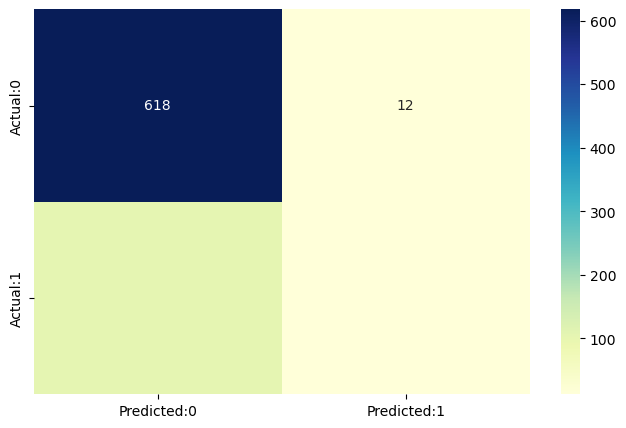

In [13]:
index_mejor = recalls.index(max(recalls))
y_pred_mejor = ypreds[index_mejor]
print(f'Best sensitivity: {np.round(recalls[index_mejor], 4)} with rate {tasas[index_mejor]}\n\n')

cm = confusion_matrix(y_test,y_pred_mejor)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(f'Specificity = {np.round(cm[0,0]/(float(cm[0,0]+cm[0,1])), 4)}\n')
print(f'TPR = Sensitivity = {np.round(cm[1,1]/(float(cm[1,1]+cm[1,0])), 4)}\n')
print(f'FPR = 1 - Specificity = {np.round(1-(cm[0,0]/(float(cm[0,0]+cm[0,1]))), 4)}\n')
print(f'False positives: {cm[0,1]}.\n')
print(f'False negatives: {cm[1,0]}.\n')
print('\nConfusion matrix for this case:')


## Conclusions

After testing the stochastic gradient descent algorithm for different learning rates, the model with the highest sensitivity was chosen because our model has a high cost associated with false negatives. This is because, as mentioned earlier, if it is determined that a patient is not sick but they actually are, the consequences can be very serious. This model corresponds to a learning rate of 0.08, as this rate was found to reduce the number of false negatives compared to what was obtained in Part 1 with the LogisticRegression function from SciKit-Learn.

However, an ideal decrease for the context of the problem was not achieved, but it can be said that this is due to a reason other than the logistic regression model used, such as the number of data points used to train the model. This is because in the different logistic regression methods used (LogisticRegression function, probabilities with threshold, and manual implementation with stochastic gradient descent), a low number of false negatives (less than 10) was not achieved in any case.
